In [22]:
import pandas as pd
from sklearn.externals import joblib
%matplotlib inline
import seaborn as sns

X = pd.read_csv('/mnt/ml-team/minerva/open-solutions/home-credit/files/unzipped_data/application_train.csv')

In [23]:
X.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Preprocessing
## Solution 3

In [24]:
X[X['DAYS_EMPLOYED'].sort_values(ascending=False) / 365. > 50]['DAYS_EMPLOYED'].nunique()

/mnt/ml-team/homes/jakub.czakon/.env/cpu_py3/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


1

# Feature Engineering
## Solution 3

In [25]:
X['annuity_income_percentage'] = X['AMT_ANNUITY'] / X['AMT_INCOME_TOTAL']
X['car_to_birth_ratio'] = X['OWN_CAR_AGE'] / X['DAYS_BIRTH']
X['car_to_employ_ratio'] = X['OWN_CAR_AGE'] / X['DAYS_EMPLOYED']
X['children_ratio'] = X['CNT_CHILDREN'] / X['CNT_FAM_MEMBERS']
X['credit_to_annuity_ratio'] = X['AMT_CREDIT'] / X['AMT_ANNUITY']
X['credit_to_goods_ratio'] = X['AMT_CREDIT'] / X['AMT_GOODS_PRICE']
X['credit_to_income_ratio'] = X['AMT_CREDIT'] / X['AMT_INCOME_TOTAL']
X['days_employed_percentage'] = X['DAYS_EMPLOYED'] / X['DAYS_BIRTH']
X['ext_sources_mean'] = X[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
X['income_credit_percentage'] = X['AMT_INCOME_TOTAL'] / X['AMT_CREDIT']
X['income_per_child'] = X['AMT_INCOME_TOTAL'] / (1 + X['CNT_CHILDREN'])
X['income_per_person'] = X['AMT_INCOME_TOTAL'] / X['CNT_FAM_MEMBERS']
X['payment_rate'] = X['AMT_ANNUITY'] / X['AMT_CREDIT']
X['phone_to_birth_ratio'] = X['DAYS_LAST_PHONE_CHANGE'] / X['DAYS_BIRTH']
X['phone_to_employ_ratio'] = X['DAYS_LAST_PHONE_CHANGE'] / X['DAYS_EMPLOYED']

In [26]:
engineered_numerical_columns = ['annuity_income_percentage',
                                 'car_to_birth_ratio',
                                 'car_to_employ_ratio',
                                 'children_ratio',
                                 'credit_to_annuity_ratio',
                                 'credit_to_goods_ratio',
                                 'credit_to_income_ratio',
                                 'days_employed_percentage',
                                 'ext_sources_mean',
                                 'income_credit_percentage',
                                 'income_per_child',
                                 'income_per_person',
                                 'payment_rate',
                                 'phone_to_birth_ratio',
                                 'phone_to_employ_ratio']

In [43]:
X_eng = X[engineered_numerical_columns + ['TARGET']]
X_eng_corr = abs(X_eng.corr())

In [44]:
X_eng_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET                       1.000000
ext_sources_mean             0.222052
credit_to_goods_ratio        0.069427
car_to_birth_ratio           0.048824
days_employed_percentage     0.042206
phone_to_birth_ratio         0.033991
credit_to_annuity_ratio      0.032102
car_to_employ_ratio          0.030553
children_ratio               0.021223
annuity_income_percentage    0.014265
payment_rate                 0.012704
income_per_child             0.012529
credit_to_income_ratio       0.007727
income_per_person            0.006571
phone_to_employ_ratio        0.004562
income_credit_percentage     0.001817
Name: TARGET, dtype: float64

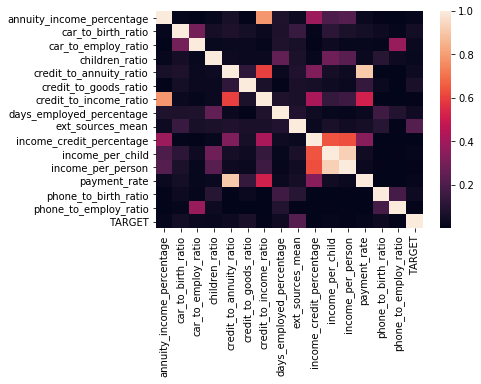

In [45]:
sns.heatmap(X_eng_corr, 
            xticklabels=X_eng_corr.columns,
            yticklabels=X_eng_corr.columns)

## Solution 4 TODO
* Explore other ext_sources features
* Explore unemployed feature